# Stata for economists

## Lecture S1: STATA must-know info
 - language review: data types, basic commands
 - syntax review: control structures, local
 variables, procedural programming
 - parsing, reshaping, merging effectively

## Basic Stata overview slide

- Basic data management
    - Reading, writing data sets
    - Generating, re-coding, parsing variables (+ regular expressions, if time is permitting)
    - Built-in functions in functions
    - Sorting, merging, reshaping, collapsing

 **Standard RA “prepare data set” project**

1. Read in data
2. Effectively summarize/tabulate data, present graphs
3. Prepare data set for analysis (generate, reshape, parse, encode, recode)
4. Preliminary regressions and output results

### Detailed data summaries

In [8]:
clear
// set mem 100m
set obs 50000
generate normal = invnormal(uniform())
generate ttail30 = invttail(30, uniform())
generate ttailX = invttail(5+floor(25*uniform()), uniform())
summ normal ttail* , detail



number of observations (_N) was 0, now 50,000





                           normal
-------------------------------------------------------------
      Percentiles      Smallest
 1%     -2.33121      -4.719238
 5%    -1.646202      -4.477449
10%    -1.281456      -4.336636       Obs              50,000
25%    -.6739217      -4.233054       Sum of Wgt.      50,000

50%    -.0039795                      Mean          -.0008432
                        Largest       Std. Dev.       .997337
75%     .6802827       3.801504
90%     1.276884       3.959307       Variance       .9946811
95%     1.638312       4.303792       Skewness       -.015323
99%     2.280843       4.373977       Kurtosis       2.982189

                           ttail30
-------------------------------------------------------------
      Percentiles      Smallest
 1%    -2.461497      -5.042024
 5%    -1.706012      -4.578815
10%    -1.318691      -4.536845       Obs              50,000
25%    -.6924468      -4.525966 

### Tabulating data

In [9]:
clear
set obs 1000
generate c = log(floor(10*uniform()))
tabulate c, missing



number of observations (_N) was 0, now 1,000

(101 missing values generated)


          c |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |         93        9.30        9.30
   .6931472 |         99        9.90       19.20
   1.098612 |         95        9.50       28.70
   1.386294 |        101       10.10       38.80
   1.609438 |         96        9.60       48.40
   1.791759 |        114       11.40       59.80
    1.94591 |        100       10.00       69.80
   2.079442 |         96        9.60       79.40
   2.197225 |        105       10.50       89.90
          . |        101       10.10      100.00
------------+-----------------------------------
      Total |      1,000      100.00


### Two-way tables

In [10]:
clear
set obs 10000
generate rand = uniform()
generate cos = round( cos(0.25 * _pi * ceil(16 * rand)), 0.0001)
generate sin = round( sin(0.25 * _pi * ceil(16 * rand)), 0.0001)
tabulate cos sin, missing



number of observations (_N) was 0, now 10,000





           |                          sin
       cos |        -1     -.7071          0      .7071          1 |     Total
-----------+-------------------------------------------------------+----------
        -1 |         0          0      1,241          0          0 |     1,241 
    -.7071 |         0      1,220          0      1,228          0 |     2,448 
         0 |     1,249          0          0          0      1,247 |     2,496 
     .7071 |         0      1,315          0      1,256          0 |     2,571 
         1 |         0          0      1,244          0          0 |     1,244 
-----------+-------------------------------------------------------+----------
     Total |     1,249      2,535      2,485      2,484      1,247 |    10,000 



In [14]:
plot cos sin


       1 +  
         |                                 *
         |  
         |  
         |          *                                            *
         |  
         |  
         |  
         |  
    c    |  
    o    |  
    s    | *                                                               *
         |  
         |  
         |  
         |  
         |  
         |  
         |          *                                            *
         |  
      -1 +                                 *
          +----------------------------------------------------------------+
               -1                       sin                              1



(note: scheme plotplain not found, using s2color)


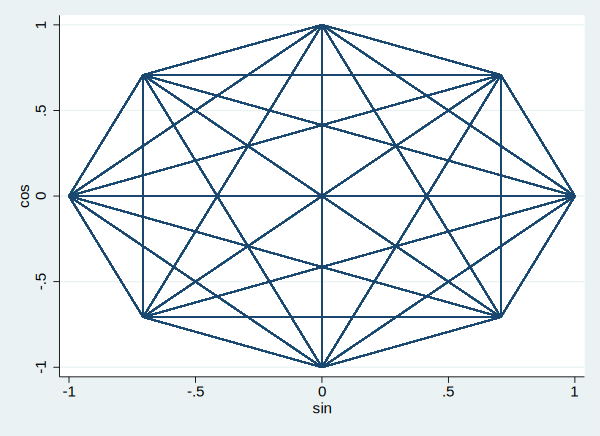

In [13]:
line cos sin

In [15]:
help twoway 

In [ ]:
 plottype              Description
    ----------------------------------------------------------------------------------
    scatter               scatterplot
    line                  line plot
    connected             connected-line plot
    scatteri              scatter with immediate arguments

    area                  line plot with shading
    bar                   bar plot
    spike                 spike plot
    dropline              dropline plot
    dot                   dot plot

    rarea                 range plot with area shading
    rbar                  range plot with bars
    rspike                range plot with spikes
    rcap                  range plot with capped spikes
    rcapsym               range plot with spikes capped with symbols
    rscatter              range plot with markers
    rline                 range plot with lines
    rconnected            range plot with lines and markers

    pcspike               paired-coordinate plot with spikes
    pccapsym              paired-coordinate plot with spikes capped with symbols
    pcarrow               paired-coordinate plot with arrows
    pcbarrow              paired-coordinate plot with arrows having two heads
    pcscatter             paired-coordinate plot with markers
    pci                   pcspike with immediate arguments
    pcarrowi              pcarrow with immediate arguments

    tsline                time-series plot
    tsrline               time-series range plot

    contour               contour plot with filled areas
    contourline           contour lines plot

    mband                 median-band line plot
    mspline               spline line plot
    lowess                LOWESS line plot
    lfit                  linear prediction plot
    qfit                  quadratic prediction plot
    fpfit                 fractional polynomial plot
    lfitci                linear prediction plot with CIs
    qfitci                quadratic prediction plot with CIs
    fpfitci               fractional polynomial plot with CIs

    function              line plot of function
    histogram             histogram plot
    kdensity              kernel density plot
    lpoly                 local polynomial smooth plot
    lpolyci               local polynomial smooth plot with CIs


### Preparing data for analysis

#### Key commands:

In [ ]:
- generate
- replace
- encode
- assert
- if, in
- sort, gsort
- merge
- reshape
- count
- append
- collapse
- reshape 
- by
- egen
    - count
    - diff 
    - group
    - max
    - mean
    - median 
    - min
    - mode
    - pctile
    - rank
    - sd
    - rowmean, rowmax, rowmin

- strfun
    - length
    - lower
    - proper
    - real
    - regexm, regexr
    - strpos
    - subinstr
    - substr
    - trim
    - upper

### De-meaning variables

In [19]:
clear
set obs 1000
generate variable = log(floor(10*uniform()))
summ variable
replace variable = variable - r(mean)
summ variable



number of observations (_N) was 0, now 1,000

(103 missing values generated)


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
    variable |        897    1.413697    .7001183          0   2.197225

(897 real changes made)


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
    variable |        897   -7.03e-17    .7001183  -1.413697   .7835275


### if/in commands

In [25]:
clear
set obs 50000
generate normal = invnormal(uniform())
list in 1/5 
list in -5/-1
list if (abs(normal)> 4.40)



number of observations (_N) was 0, now 50,000



     +------------+
     |     normal |
     |------------|
  1. |  .88506176 |
  2. |  .89613585 |
  3. | -1.6226075 |
  4. | -1.4915617 |
  5. |  .99612717 |
     +------------+


       +------------+
       |     normal |
       |------------|
49996. | -.11332471 |
49997. | -.28949365 |
49998. | -1.5485191 |
49999. |  1.0444488 |
50000. | -.06409163 |
       +------------+


       +------------+
       |     normal |
       |------------|
42285. | -4.4203927 |
       +------------+


- Programming language details (control structures, variables,procedures)
    - forvalues, foreach, while, if, in
    - Global, local, and temporary variables
    - Missing variables ( Missing variables (worst programming language design decision in all of programming language design decision in all of
    Stata)

- Programming “best practices”
    - Comments
    - Assertions
    - Summaries, tabulations (and LOOK at them!)

- Commonly-used built-in features
    - Regression and post-estimation commands
    - Outputting results

## Lecture S2: Intermediate Stata
 - quick tour of built-in commands
 - ADO files
 - bootstrapping, Monte Carlo simulations
 - Stata matrix language 

## Lecture S3: NLLS and MLE
 - Non-linear least squares (NLLS) estimators
 - Maximum likelihood estimation (MLE) 

## Lecture S4: Mata, GMM
 - NLLS and GMM in Stata ML
 - Introduction to Mata
 - GMM in Stata using Mata
 - Using Mata in Stata effectively

## Lecture S5: Large data sets and numerical precision
 - Tips/tricks
 - Breaking abstraction barrier
 - Using Mata when Stata won’t do
 - When to leave Stata
 - Matrix equilibration
 - Binary representation 